<a href="https://colab.research.google.com/github/KesteHarshada87/MachineLearning/blob/main/AssociationRule(AprioriAlgo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1️⃣: Load a sample transactional dataset

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Sample dataset — each list is a transaction
dataset = [
    ['Milk', 'Bread', 'Eggs'],
    ['Milk', 'Bread'],
    ['Milk', 'Eggs'],
    ['Bread', 'Butter'],
    ['Milk', 'Bread', 'Butter', 'Eggs'],
    ['Bread', 'Butter'],
    ['Milk', 'Eggs'],
    ['Butter', 'Eggs'],
    ['Milk', 'Bread', 'Butter'],
    ['Bread', 'Eggs']
]

# Display the dataset
for i, transaction in enumerate(dataset, 1):
    print(f"Transaction {i}: {transaction}")


Transaction 1: ['Milk', 'Bread', 'Eggs']
Transaction 2: ['Milk', 'Bread']
Transaction 3: ['Milk', 'Eggs']
Transaction 4: ['Bread', 'Butter']
Transaction 5: ['Milk', 'Bread', 'Butter', 'Eggs']
Transaction 6: ['Bread', 'Butter']
Transaction 7: ['Milk', 'Eggs']
Transaction 8: ['Butter', 'Eggs']
Transaction 9: ['Milk', 'Bread', 'Butter']
Transaction 10: ['Bread', 'Eggs']


In [2]:
# Step 2️⃣: Data Preprocessing (One-Hot Encoding)

from mlxtend.preprocessing import TransactionEncoder

# Initialize the TransactionEncoder
te = TransactionEncoder()

# Fit and transform the dataset
te_ary = te.fit(dataset).transform(dataset)

# Convert to DataFrame for easier viewing
df = pd.DataFrame(te_ary, columns=te.columns_)

# Display the preprocessed DataFrame
print("\nOne-Hot Encoded Transaction Data:\n")
print(df)



One-Hot Encoded Transaction Data:

   Bread  Butter   Eggs   Milk
0   True   False   True   True
1   True   False  False   True
2  False   False   True   True
3   True    True  False  False
4   True    True   True   True
5   True    True  False  False
6  False   False   True   True
7  False    True   True  False
8   True    True  False   True
9   True   False   True  False


In [3]:
# Step 3️⃣: Generate Frequent Itemsets using Apriori

from mlxtend.frequent_patterns import apriori

# Apply Apriori with a minimum support threshold
# Support means the fraction of transactions containing the itemset
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)

# Sort by support (descending)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

# Display the frequent itemsets
print("\nFrequent Itemsets (min_support=0.3):\n")
print(frequent_itemsets)



Frequent Itemsets (min_support=0.3):

   support         itemsets
0      0.7          (Bread)
2      0.6           (Eggs)
3      0.6           (Milk)
1      0.5         (Butter)
4      0.4  (Butter, Bread)
6      0.4    (Milk, Bread)
7      0.4     (Milk, Eggs)
5      0.3    (Bread, Eggs)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [4]:
# Step 4️⃣: Apply Rule Mining (Generate Association Rules)

from mlxtend.frequent_patterns import association_rules

# Generate association rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Filter rules with minimum lift > 1 (indicating positive correlation)
rules = rules[rules['lift'] > 1]

# Display the generated rules
print("\nAssociation Rules (Confidence ≥ 0.6, Lift > 1):\n")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])



Association Rules (Confidence ≥ 0.6, Lift > 1):

  antecedents consequents  support  confidence      lift
0    (Butter)     (Bread)      0.4    0.800000  1.142857
2      (Milk)      (Eggs)      0.4    0.666667  1.111111
3      (Eggs)      (Milk)      0.4    0.666667  1.111111


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [5]:
# Step 5️⃣: Interpret and Sort Rules

# Sort rules by confidence (descending order)
rules_sorted = rules.sort_values(by='confidence', ascending=False)

# Display top rules
print("\nTop Association Rules (sorted by Confidence):\n")
for idx, row in rules_sorted.iterrows():
    antecedent = ', '.join(list(row['antecedents']))
    consequent = ', '.join(list(row['consequents']))
    conf = round(row['confidence'] * 100, 2)
    lift = round(row['lift'], 2)
    print(f"If a customer buys {{{antecedent}}}, they are likely to buy {{{consequent}}} "
          f"with {conf}% confidence and lift = {lift}.")


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


Top Association Rules (sorted by Confidence):

If a customer buys {Butter}, they are likely to buy {Bread} with 80.0% confidence and lift = 1.14.
If a customer buys {Milk}, they are likely to buy {Eggs} with 66.67% confidence and lift = 1.11.
If a customer buys {Eggs}, they are likely to buy {Milk} with 66.67% confidence and lift = 1.11.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

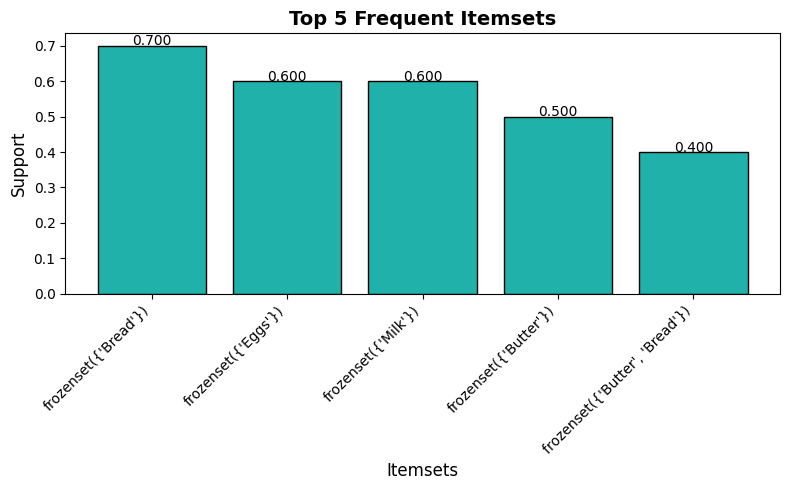

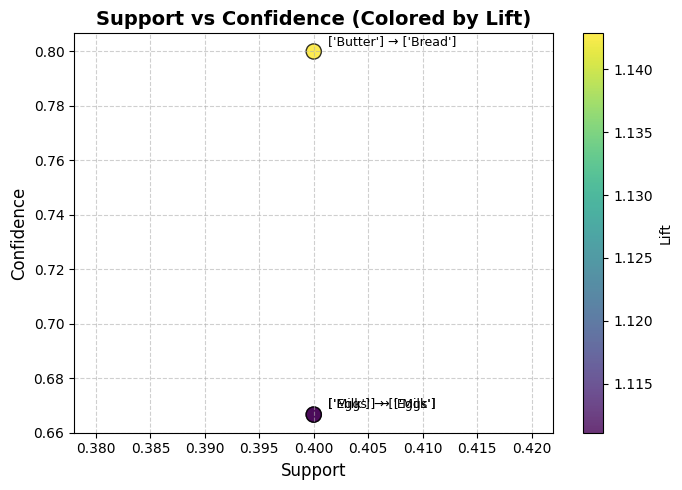

In [8]:
# Step 6️⃣: Visualization (Clean Output)

import matplotlib.pyplot as plt
import warnings

# Ignore warnings (like edgecolor messages from Matplotlib)
warnings.filterwarnings("ignore")

# --- (A) Bar Chart of Top Frequent Itemsets ---
top_items = frequent_itemsets.sort_values(by='support', ascending=False).head(5)

plt.figure(figsize=(8, 5))
bars = plt.bar(top_items['itemsets'].astype(str), top_items['support'],
               color='lightseagreen', edgecolor='black')
plt.title("Top 5 Frequent Itemsets", fontsize=14, fontweight='bold')
plt.xlabel("Itemsets", fontsize=12)
plt.ylabel("Support", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add support value labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f"{bar.get_height():.3f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# --- (B) Scatter Plot of Support vs Confidence ---
plt.figure(figsize=(7, 5))
scatter = plt.scatter(rules['support'], rules['confidence'],
                      s=120, c=rules['lift'], cmap='viridis', alpha=0.8, edgecolors='black')

plt.colorbar(scatter, label='Lift')
plt.title("Support vs Confidence (Colored by Lift)", fontsize=14, fontweight='bold')
plt.xlabel("Support", fontsize=12)
plt.ylabel("Confidence", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Annotate a few top rules
top_rules = rules.sort_values(by='lift', ascending=False).head(3)
for _, rule in top_rules.iterrows():
    plt.annotate(f"{list(rule['antecedents'])} → {list(rule['consequents'])}",
                 (rule['support'], rule['confidence']),
                 textcoords="offset points", xytext=(10,5), ha='left', fontsize=9)

plt.tight_layout()
plt.show()

# ✅ Ensure nothing else prints (no DataFrame display)
None
